Lending Club is a company based in San Francisco that operates the world’s largest online peer-to-peer lending platform. It allows borrowers to create online loan listings, which investors can browse, and using information provided about the borrower and loan conditions, can select loan(s) to fund. The company generates revenue by charging customers origination and service fees. Lending Club was founded in 2007, and has since grown rapidly, boasting more than 1.5 million customers and over US $26 billion in total loan issuance. In 2011 and 2012, it was recognised by Forbes as one of America’s 20 most promising companies and in 2014, was listed by Inc. as one of the 300 fastest growing private companies in the USA.


While it can be a good investment option, lending money through Lending Club can be understandably daunting for members of the public. As such, a predictive model that can accurately predict whether borrowers will pay back their loans would be a useful tool when choosing which loan(s) to fund, if any. The purpose of this project is to use data science and machine learning techniques to build a model that can be used to predict whether or not a loan will be paid back in full. Data on all of Lending Club’s approved loans from 2007-2011 was used for this project, and can be found on their website: https://www.lendingclub.com/info/download-data.action


In [9]:
#Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from imblearn.over_sampling import SMOTE

#Read in the data
df = pd.read_csv("loan_data.csv")

# Print the number of rows and number of columns in the dataset
print(df.shape)

# Display the first 5 rows of the dataset, to give a preview of the data
df.head(5)

(42538, 120)


C:\NewAnaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculate percentage of missing values for each variable
nulls = df.isnull().sum()/42538.0*100
nulls = zip(df.columns.tolist(), nulls)

# Print all variable names that have more than 10% missing values
[x for x in nulls if x[1] > 10]

[('url', 100.0),
 ('desc', 31.25675866284264),
 ('mths_since_last_delinq', 63.30575015280455),
 ('mths_since_last_record', 91.41708589966619),
 ('next_pymnt_d', 93.53754290281631),
 ('mths_since_last_major_derog', 100.0),
 ('annual_inc_joint', 100.0),
 ('dti_joint', 100.0),
 ('verification_status_joint', 100.0),
 ('tot_coll_amt', 100.0),
 ('tot_cur_bal', 100.0),
 ('open_acc_6m', 100.0),
 ('open_il_6m', 100.0),
 ('open_il_12m', 100.0),
 ('open_il_24m', 100.0),
 ('mths_since_rcnt_il', 100.0),
 ('total_bal_il', 100.0),
 ('il_util', 100.0),
 ('open_rv_12m', 100.0),
 ('open_rv_24m', 100.0),
 ('max_bal_bc', 100.0),
 ('all_util', 100.0),
 ('total_rev_hi_lim', 100.0),
 ('inq_fi', 100.0),
 ('total_cu_tl', 100.0),
 ('inq_last_12m', 100.0),
 ('acc_open_past_24mths', 100.0),
 ('avg_cur_bal', 100.0),
 ('bc_open_to_buy', 100.0),
 ('bc_util', 100.0),
 ('mo_sin_old_il_acct', 100.0),
 ('mo_sin_old_rev_tl_op', 100.0),
 ('mo_sin_rcnt_rev_tl_op', 100.0),
 ('mo_sin_rcnt_tl', 100.0),
 ('mort_acc', 100.0),
 

There were 120 variables, so I had to look at these carefully and select the useful ones. I used the data dictionary provided by Lending Club to understand exactly what each variable meant: https://resources.lendingclub.com/LCDataDictionary.xlsx

By deleting irrelevant variables (member id, title, url, etc), poorly documented features and less
important predictors (payment plan, zip code, etc), I was left with a more manageable set of features. I also got rid of variables that had too many missing values and ones that were hard to extract predictive power from (e.g. employer title) and ended up with 11 features.

In [47]:
# Delete unwanted variables from dataset

indices_to_del = [1, 2, 5, 6, 7, 8, 12, 13, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37,
                  38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
                  65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
                  92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
                  116, 117, 118, 119]
df.drop(df.columns[indices_to_del], axis=1, inplace = True)

In [50]:
# Display percentage of missing values for new set of features

nulls = df.isnull().sum()/42538.0*100
nulls = zip(df.columns.tolist(), nulls)
nulls

[('loan_amnt', 0.007052517748836334),
 ('term', 0.007052517748836334),
 ('int_rate', 0.007052517748836334),
 ('emp_length', 2.621185763317504),
 ('home_ownership', 0.007052517748836334),
 ('annual_inc', 0.01645587474728478),
 ('loan_status', 0.007052517748836334),
 ('dti', 0.007052517748836334),
 ('delinq_2yrs', 0.07522685598758756),
 ('open_acc', 0.07522685598758756),
 ('pub_rec_bankruptcies', 3.2159480934693687)]

In [4]:
# Display the unique values of each of the categorical variables

print df.loan_status.value_counts()
print "____________________________________________________________"
print df.term.value_counts()
print "____________________________________________________________"
print df.emp_length.value_counts()
print "____________________________________________________________"
print df.home_ownership.value_counts()
print "____________________________________________________________"

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64
____________________________________________________________
 36 months    31534
 60 months    11001
Name: term, dtype: int64
____________________________________________________________
10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64
____________________________________________________________
RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64
____________________________________________________________


Next, I continued the data cleaning process with the following steps:
- Get rid of the '%' sign in the interest rate variable, and convert it to the float data type. 
- Remove any rows that don't have loan_status as either 'Fully Paid' or 'Charged Off'. This is because if a loan application is listed as 'Does not meet credit policy', then it wouldn't meet today's credit policy and wouldn't be approved on to the marketplace. As such, it wouldn't even be available for people to fund, so these loans aren't of use
- Encode categorical variables 
- Convert the 'term' variable to integer data type
- Deal with missing values in the dataset

In [5]:
# Get rid of % sign in the interest rate and convert it from string to float 
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

In [6]:
# Remove any rows that do not have loan_status as either 'Fully paid' or 'Charged off'
#print df.home_ownership.value_counts()

df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

The categorical variables are ordinal (they have a natural ordering), so simple label encoding can be used instead of one-hot 
encoding, which is another encoding method (a downside of one-hot encoding is that the number of columns in the dataset would increase by more than 100%).

I didn't include home_ownership values of 'OTHER' in the encoding, since I considered these values as missing values, which I deleted (as explained later on)

In [7]:
# Encode categorical (ordinal) variables

mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0},
    
    'loan_status': 
       {'Fully Paid': 1,
       'Charged Off': 0},
    
    'home_ownership': 
       {'NONE': 0,
       'RENT': 1,
       'MORTGAGE': 2,
       'OWN': 3}
}

df = df.replace(mapping_dict)

In [8]:
# Check that the encoding worked correctly
print df.loan_status.value_counts()

1    34116
0     5670
Name: loan_status, dtype: int64


Next I checked for any remaining missing values that hadn't been dealt with yet. Remember from above that I treated home_ownership values of 'OTHER' as missing values.

In [12]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))
print "\n___________________________________________________"
print "home_ownership value counts:"
print df.home_ownership.value_counts()
print df.shape

Number of null values in each column:
loan_amnt                  0
term                       0
int_rate                   0
emp_length              1078
home_ownership             0
annual_inc                 0
loan_status                0
dti                        0
delinq_2yrs                0
open_acc                   0
pub_rec_bankruptcies     697
dtype: int64

___________________________________________________
home_ownership value counts:
1        18918
2        17703
3         3064
OTHER       98
0            3
Name: home_ownership, dtype: int64
(39786, 11)


Less than 0.25% of the data had home ownership as 'OTHER', so I decided to delete these rows, since it wouldn't significantly 
decrease the amount of data.

There were only 1078 rows with missing data for the emp_length column, so I deleted these rows too.

Finally, a few more rows contained null values, so I deleted them (this was the quickest way to deal with missing values, although I could have used imputation methods if I'd wanted to preserve as much data as possible) 

In [9]:
df = df[df.home_ownership != 'OTHER']
df = df[df.emp_length.notnull()]
df = df.dropna()

In [10]:
#Strip unecessary text from the 'term' variable and then convert it to integer data type
df['term'] = df['term'].str.rstrip(' months').astype('int')

In [15]:
# Save the clean data to a new csv file
df.to_csv("final_loan_data.csv", index = False)

Next, I did some data visualisation. 

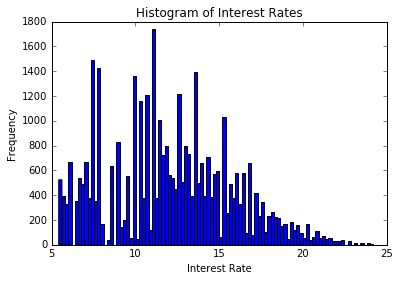

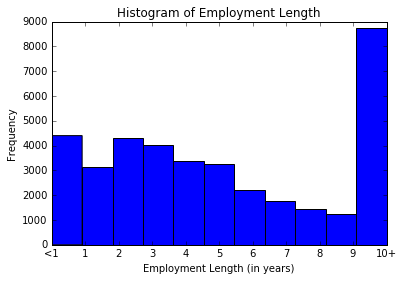

In [11]:
# Create histograms of interest rate and employment length
plt.hist(df['int_rate'], bins = 100)
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Interest Rates')
plt.show()

plt.hist(df['emp_length'], bins = 11)
plt.xlabel('Employment Length (in years)')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], ['<1','1','2','3','4','5','6','7','8','9','10+'])
plt.title('Histogram of Employment Length')
plt.show()

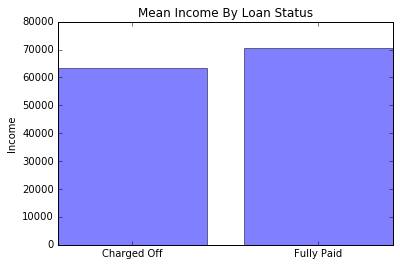

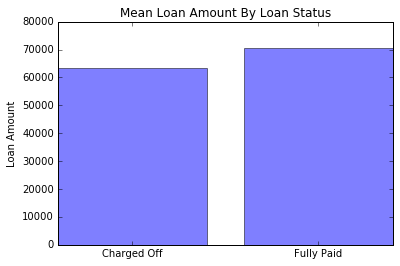

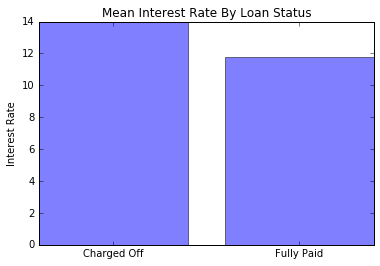

In [17]:
mean_inc_charged_off = df[df.loan_status == 0]['annual_inc'].mean()
mean_inc_paid = df[df.loan_status == 1]['annual_inc'].mean()
labels = ('Charged Off', 'Fully Paid')
y_pos = np.arange(len(labels))
mean_inc = [mean_inc_charged_off, mean_inc_paid]
plt.bar(y_pos, mean_inc, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Income')
plt.title('Mean Income By Loan Status')
plt.show()

mean_loan_amnt_charged_off = df[df.loan_status == 0]['loan_amnt'].mean()
mean_loan_amnt_paid = df[df.loan_status == 1]['loan_amnt'].mean()
labels = ('Charged Off', 'Fully Paid')
y_pos = np.arange(len(labels))
mean_loan_amnt = [mean_loan_amnt_charged_off, mean_loan_amnt_paid]
plt.bar(y_pos, mean_inc, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount By Loan Status')
plt.show()

mean_int_rate_charged_off = df[df.loan_status == 0]['int_rate'].mean()
mean_int_rate_paid = df[df.loan_status == 1]['int_rate'].mean()
labels = ('Charged Off', 'Fully Paid')
y_pos = np.arange(len(labels))
mean_int_rate = [mean_int_rate_charged_off, mean_int_rate_paid]
plt.bar(y_pos, mean_int_rate, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Interest Rate')
plt.title('Mean Interest Rate By Loan Status')
plt.show()

From the graphs above, it's clear that fully paid loans had higher applicant incomes, higher loan amounts and lower interest rates than loans that were charged off.

Next, I created a scatterplot of Interest Rate VS Annual Income, and colour-coded the data points according to the loan outcome

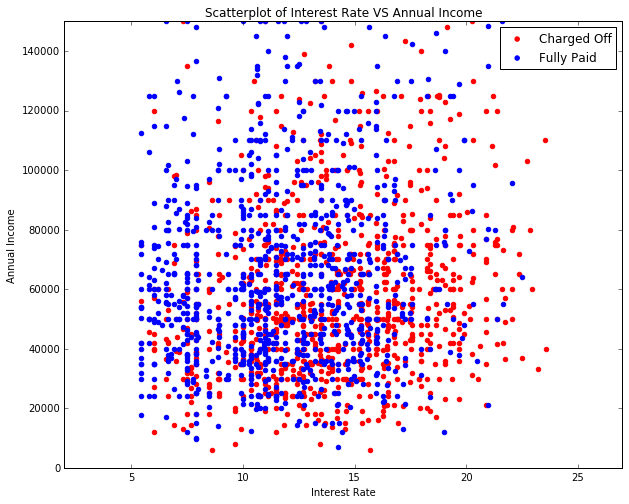

In [40]:
# Take random samples of data to balance the number of data points of each outcome and avoid making the plot too cluttered
data_charged_off = df[df.loan_status == 0].sample(n = 1000)
data_paid = df[df.loan_status == 1].sample(n = 1000)
data = pd.concat([data_charged_off, data_paid])

# Colour code the data points
#color = ['red' if i == 0 else 'blue' for i in data['loan_status']]

plt.figure(figsize = (10,8))
plt.scatter(data_charged_off['int_rate'], data_charged_off['annual_inc'], color = 'red', label = 'Charged Off')
plt.scatter(data_paid['int_rate'], data_paid['annual_inc'], color = 'blue', label = 'Fully Paid')

plt.legend(loc='upper right', scatterpoints = 1)
plt.xlim((2,27))
plt.ylim((0,150000))
plt.title('Scatterplot of Interest Rate VS Annual Income')
plt.xlabel('Interest Rate')
plt.ylabel('Annual Income')
plt.show()

I also created a correlation matrix, which was useful in spotting trends between variables (and to see which features had predictive power). I also used the correlation matrix in the data cleaning phase to find pairs of highly correlated features (e.g. installment and loan amount), and I deleted one of the variables from these pairs, since having highly correlated features can overemphasise the importance of a certain feature, thus decreasing model performance.

In [82]:
print "Correlation between loan status and other variables:"
print df.corr()['loan_status']

Correlation between loan status and other variables:
loan_amnt              -0.050876
int_rate               -0.201380
emp_length             -0.012531
annual_inc              0.040210
loan_status             1.000000
dti                    -0.039510
delinq_2yrs            -0.017507
open_acc                0.007767
pub_rec_bankruptcies   -0.045567
Name: loan_status, dtype: float64


From the correlation matrix, one can see that loans are more likely to be charged off with higher loan amounts, longer terms and higher interest rates, but are less likely to be charged off if the applicant has a higher annual income. While these findings are obvious, it's good to see that the data confirms them.

Next, I began the process of creating machine learning models and testing them.

In [3]:
# Read data from csv file and separate the features from the response variable
df = pd.read_csv("final_loan_data.csv")
features = [x for x in df.columns.tolist() if x != 'loan_status']
response = 'loan_status'

X = df[features]
Y = df[response]

# Split the data into a training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [4]:
# Train a Decision Tree Classifier with the training data

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
# Generate predictions for the loan status of records in the test set 
y_predict = dt.predict(X_test)
# Calculate the accuracy score of the classifier
print "Accuracy score: " + str(round(accuracy_score(y_test, y_predict)*100, 3)) + "%"

Accuracy score: 76.49%


In [46]:
# Display more information about model performance

table = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)
print table
print "________________________________________________________"
correct_paid_pct = table.loc[1][1]/float(table.loc[1][2]) * 100
correct_co_pct = table.loc[0][0]/float(table.loc[0][2]) * 100
print "Percentage of paid off loans correctly predicted: " + str(round(correct_paid_pct,3))
print "Percentage of charged off loans correctly predicted: " + str(round(correct_co_pct,3))
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_predict)

Predicted     0     1    All
Actual                      
0           325  1275   1600
1          1399  8375   9774
All        1724  9650  11374
________________________________________________________
Percentage of paid off loans correctly predicted: 85.687
Percentage of charged off loans correctly predicted: 20.313


The accuracy of around 76% isn't bad, but we can see that the model correctly predicted that a loan was charged off only 20% of the time. This is due to class imbalance - the training data contains many more examples of fully paid loans than charged off ones. As such, it can achieve a high accuracy simply by predicting that every loan will be fully paid (such a model would have a high accuracy, but would not manage to identify loans that will be charged off). This problem can be solved by creating synthetic observations based upon the existing minority class observations. I used a popular technique called SMOTE to do this.

In [20]:
# Synthetically create data to balance the training set
X_train_new, y_train_new = SMOTE().fit_sample(X_train, y_train)

In [44]:
# Refit the classifier, this time with the balanced data
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train_new)

# Generate predictions for the loan status of records in the test set 
y_predict = dt.predict(X_test)

# Calculate and print the accuracy score of the classifier
print "Accuracy score: " + str(round(accuracy_score(y_test, y_predict)*100, 3)) + "%"

# Display more information about model performance
table = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)
correct_paid_pct = table.loc[1][1]/float(table.loc[1][2]) * 100
correct_co_pct = table.loc[0][0]/float(table.loc[0][1]) * 100
print "Percentage of paid off loans correctly predicted: " + str(round(correct_paid_pct,3))
print "Percentage of charged off loans correctly predicted: " + str(round(correct_co_pct,3))

Accuracy score: 74.442%
Percentage of paid off loans correctly predicted: 82.689
Percentage of charged off loans correctly predicted: 29.835


We can see that these are much better results - the percentage of charged off loans identified by our model increased by 13% after using the SMOTE method, without decreasing the overall accuracy too much. Further improvements could be made to the model by employing cross validation, creating more informative features, tuning model hyperparameters and using different machine learning algorithms.